In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np
from pprint import pprint


In [4]:
data_df = pd.read_csv('covid_housing_data_2018.csv')

In [5]:
data_df.head()

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,median_sale_price,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy
0,25540,-2,"Hartford, CT metro area",metro,6/11/2018,6/17/2018,1 weeks,403.0,0.092141,403.0,...,235000.0,-0.008439,132.596685,-0.033132,14.0,-27.0,344.0,NaN,0.048132,NaN
1,257,5,"Hot Spring County, AR",county,3/5/2018,3/11/2018,1 weeks,6.0,0.500000,6.0,...,92450.0,-0.428439,51.972227,-0.343256,0.0,-1.0,4.0,-0.428571,0.038835,-0.021510
2,25540,-2,"Hartford, CT metro area",metro,7/23/2018,7/29/2018,1 weeks,406.0,-0.169734,406.0,...,230000.0,0.045455,135.910371,0.000647,16.0,2.0,326.0,NaN,0.046819,NaN
3,25540,-2,"Hartford, CT metro area",metro,12/14/2020,12/20/2020,1 weeks,440.0,0.176471,440.0,...,261750.0,0.165924,142.611028,0.102003,12.0,-0.5,80.0,-0.245283,0.023141,0.001658
4,257,5,"Hot Spring County, AR",county,10/26/2020,11/1/2020,1 weeks,6.0,2.000000,6.0,...,125734.5,-0.054272,83.814092,0.405883,15.5,2.0,NaN,NaN,NaN,NaN


In [6]:
len(data_df)

735639

In [7]:
data_df.columns

Index(['region_id', 'region_type_id', 'region_name', 'region_type',
       'period_begin', 'period_end', 'duration', 'total_homes_sold',
       'total_homes_sold_yoy', 'average_homes_sold', 'average_homes_sold_yoy',
       'total_homes_sold_with_price_drops',
       'total_homes_sold_with_price_drops_yoy',
       'average_homes_sold_with_price_drops',
       'average_homes_sold_with_price_drops_yoy',
       'percent_homes_sold_with_price_drops',
       'percent_homes_sold_with_price_drops_yoy', 'median_sale_price',
       'median_sale_price_yoy', 'median_sale_ppsf', 'median_sale_ppsf_yoy',
       'median_days_to_close', 'median_days_to_close_yoy', 'price_drops',
       'price_drops_yoy', 'percent_active_listings_with_price_drops',
       'percent_active_listings_with_price_drops_yoy'],
      dtype='object')

In [8]:
# select 4 weeks duration, county, and NY state
ny_county_data_df = data_df[(data_df['duration'] == '4 weeks') & (data_df['region_type_id'] == 5) & (data_df['region_name'].str.contains('NY') )]
ny_county_data_df.head()

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,median_sale_price,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy
81300,1946,5,"Allegany County, NY",county,3/9/2020,4/5/2020,4 weeks,9.0,-0.181818,2.0,...,55500.0,-0.061311,38.700087,0.059502,52.6,3.5,2.0,-0.500000,0.021663,0.000379
81310,1946,5,"Allegany County, NY",county,6/22/2020,7/19/2020,4 weeks,25.0,-0.074074,6.0,...,82000.0,0.073826,63.540428,0.330942,67.7,-2.1,3.0,-0.500000,0.034075,-0.002792
81311,1997,5,"Sullivan County, NY",county,12/23/2019,1/19/2020,4 weeks,65.0,0.120690,16.0,...,147250.0,0.117647,98.003313,0.067588,57.1,-0.6,12.0,0.000000,0.020588,0.001982
81312,1997,5,"Sullivan County, NY",county,10/7/2019,11/3/2019,4 weeks,83.0,-0.107527,20.0,...,145175.0,0.082386,95.461183,0.159072,48.5,0.9,31.0,0.192308,0.038599,0.006704
81313,1946,5,"Allegany County, NY",county,12/30/2019,1/26/2020,4 weeks,16.0,-0.238095,4.0,...,71000.0,0.198946,47.313213,0.471629,53.7,-1.0,2.0,-0.333333,0.021227,-0.002409


In [9]:
# select NY city counties
ny_city_counties = ['Kings County, NY', 'Bronx County, NY','Richmond County, NY', 'New York County, NY','Queens County, NY']
ny_city_county_df = ny_county_data_df[ny_county_data_df['region_name'].isin (ny_city_counties)]
ny_city_county_df

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,median_sale_price,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy
184809,1947,5,"Bronx County, NY",county,4/15/2019,5/12/2019,4 weeks,176.0,0.066667,44.0,...,487187.5,0.172180,281.064175,0.138735,72.6,8.8,35.0,0.206897,0.028978,0.006943
184813,1947,5,"Bronx County, NY",county,5/11/2020,6/7/2020,4 weeks,88.0,-0.460123,22.0,...,516250.0,0.127491,304.395545,0.173748,83.2,12.4,17.0,-0.604651,0.017052,-0.017552
184816,1947,5,"Bronx County, NY",county,8/20/2018,9/16/2018,4 weeks,194.0,-0.025126,48.0,...,477006.2,0.103223,270.179165,0.055092,63.7,-5.8,36.0,0.285714,0.026511,0.004773
184817,1947,5,"Bronx County, NY",county,1/22/2018,2/18/2018,4 weeks,179.0,0.040698,44.0,...,472250.0,0.209047,245.778401,0.070920,71.3,-0.7,22.0,-0.476190,0.019334,-0.013411
184843,1947,5,"Bronx County, NY",county,12/2/2019,12/29/2019,4 weeks,175.0,-0.107143,43.0,...,511625.0,-0.028714,289.096719,0.030122,76.1,11.1,20.0,-0.090909,0.018788,0.001557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656549,1985,5,"Queens County, NY",county,4/15/2019,5/12/2019,4 weeks,679.0,0.059282,169.0,...,587250.0,0.062151,415.394918,0.026918,70.0,-4.2,164.0,0.401709,0.028771,0.004377
656560,1985,5,"Queens County, NY",county,11/2/2020,11/29/2020,4 weeks,647.0,-0.031437,161.0,...,672250.0,0.063939,459.925326,0.046790,81.6,4.3,201.0,0.280255,0.029861,0.001669
656569,1985,5,"Queens County, NY",county,5/27/2019,6/23/2019,4 weeks,660.0,-0.085873,165.0,...,592487.5,0.033108,435.502574,0.026184,75.3,1.7,210.0,0.544118,0.035231,0.008236
656616,1985,5,"Queens County, NY",county,12/10/2018,1/6/2019,4 weeks,614.0,-0.119082,153.0,...,598125.0,0.003145,419.841642,-0.007095,77.0,-2.2,85.0,0.603774,0.016185,0.003270


C:\Users\restr\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\restr\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\restr\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

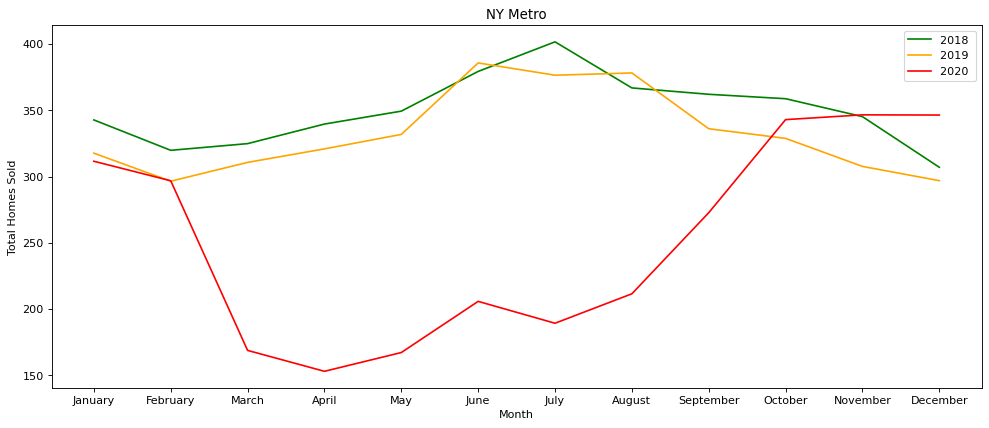

In [13]:
ny_city_county_df.columns
nyc_county = ny_city_county_df[['region_name', 'region_type','period_begin', 'period_end', 'duration','total_homes_sold',
       'total_homes_sold_yoy', 'average_homes_sold', 'average_homes_sold_yoy',
       'total_homes_sold_with_price_drops',
       'total_homes_sold_with_price_drops_yoy','percent_active_listings_with_price_drops',
       'percent_active_listings_with_price_drops_yoy']]
nyc_county['year'] = pd.DatetimeIndex(nyc_county['period_begin']).year
nyc_county['month'] = pd.DatetimeIndex(nyc_county['period_begin']).month_name()
nyc_county['month_int'] = pd.DatetimeIndex(nyc_county['period_begin']).month
group_year_nyc = nyc_county.groupby(['year', 'month', 'month_int'])
groupby_nyc = group_year_nyc.mean()
ungroup_nyc = groupby_nyc.reset_index()


nyc2018 = ungroup_nyc.loc[ungroup_nyc['year']==2018]
nyc2018 = nyc2018.sort_values(by= 'month_int')
nyc2018 = nyc2018.reset_index(drop=True)

nyc2019 = ungroup_nyc.loc[ungroup_nyc['year']==2019]
nyc2019 = nyc2019.sort_values(by= 'month_int')
nyc2019 = nyc2019.reset_index(drop=True)

nyc2020 = ungroup_nyc.loc[ungroup_nyc['year']==2020]
nyc2020 = nyc2020.sort_values(by= 'month_int')
nyc2020 = nyc2020.reset_index(drop=True)

nyc2018_x = nyc2018["month"]
nyc2018_y = nyc2018["total_homes_sold"]

nyc2019_x = nyc2019["month"]
nyc2019_y = nyc2019["total_homes_sold"]

nyc2020_x = nyc2020["month"]
nyc2020_y = nyc2020["total_homes_sold"]

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(nyc2018_x, nyc2018_y, color = 'green', label = '2018 ')
plt.plot(nyc2019_x, nyc2019_y, color = 'orange', label = '2019 ')
plt.plot(nyc2020_x, nyc2020_y, color = 'red', label = '2020 ')
plt.title("NY Metro")
plt.xlabel("Month")
plt.ylabel("Total Homes Sold")
plt.legend(loc="best")
plt.savefig("NYMetro_homes_sold.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
plt.show()





C:\Users\restr\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\restr\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\restr\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a

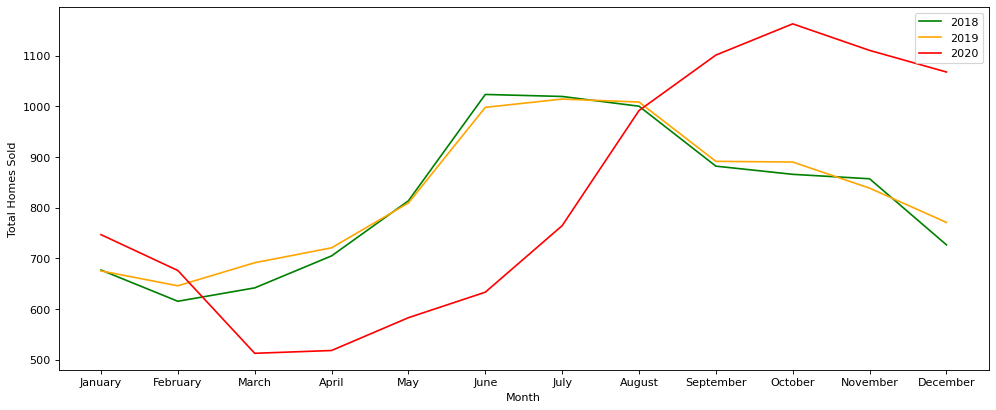

In [14]:
ny_suburb_counties = ['Nassau County, NY', 'Suffolk County, NY','Westchester County, NY', 'Rockland County, NY']

ny_suburb_county_df = ny_county_data_df[ny_county_data_df['region_name'].isin(ny_suburb_counties)]

ny_suburbs = ny_suburb_county_df[['region_name', 'region_type','period_begin', 'period_end', 'duration','total_homes_sold',
       'total_homes_sold_yoy', 'average_homes_sold', 'average_homes_sold_yoy',
       'total_homes_sold_with_price_drops',
       'total_homes_sold_with_price_drops_yoy','percent_active_listings_with_price_drops',
       'percent_active_listings_with_price_drops_yoy']]
ny_suburbs['year'] = pd.DatetimeIndex(ny_suburbs['period_begin']).year
ny_suburbs['month'] = pd.DatetimeIndex(ny_suburbs['period_begin']).month_name()
ny_suburbs['month_int'] = pd.DatetimeIndex(ny_suburbs['period_begin']).month
group_year_suburbs = ny_suburbs.groupby(['year', 'month', 'month_int'])
groupby_nysuburb = group_year_suburbs.mean()
ungroup_nysuburb = groupby_nysuburb.reset_index()

nysuburbs2018 = ungroup_nysuburb.loc[ungroup_nysuburb['year']==2018]
nysuburbs2018 = nysuburbs2018.sort_values(by= 'month_int')
nysuburbs2018 = nysuburbs2018.reset_index(drop=True)

nysuburbs2019 = ungroup_nysuburb.loc[ungroup_nysuburb['year']==2019]
nysuburbs2019 = nysuburbs2019.sort_values(by= 'month_int')
nysuburbs2019 = nysuburbs2019.reset_index(drop=True)

nysuburbs2020 = ungroup_nysuburb.loc[ungroup_nysuburb['year']==2020]
nysuburbs2020 = nysuburbs2020.sort_values(by= 'month_int')
nysuburbs2020 = nysuburbs2020.reset_index(drop=True)

nysuburbs2018_x = nysuburbs2018["month"]
nysuburbs2018_y = nysuburbs2018["total_homes_sold"]

nysuburbs2019_x = nysuburbs2019["month"]
nysuburbs2019_y = nysuburbs2019["total_homes_sold"]

nysuburbs2020_x = nysuburbs2020["month"]
nysuburbs2020_y = nysuburbs2020["total_homes_sold"]

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(nysuburbs2018_x, nysuburbs2018_y, color = 'green', label = '2018')
plt.plot(nysuburbs2019_x, nysuburbs2019_y, color = 'orange', label = '2019')
plt.plot(nysuburbs2020_x, nysuburbs2020_y, color = 'red', label = '2020')
plt.xlabel("Month")
plt.ylabel("Total Homes Sold")
plt.legend(loc="best")
plt.savefig("NYSuburbs_homes_sold.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
plt.show()

C:\Users\restr\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\restr\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\restr\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

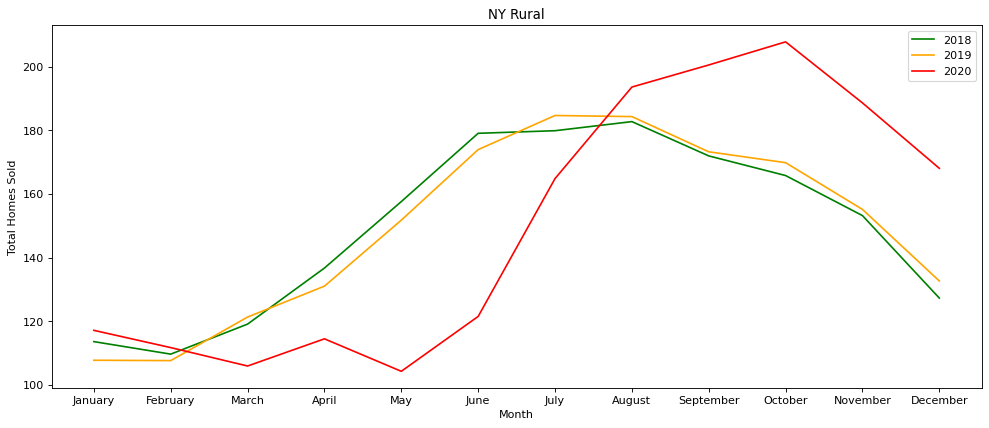

In [15]:
# Remove NY city and suburb counties to create rural county list
counties_to_remove = ['Nassau County, NY', 'Suffolk County, NY','Westchester County, NY', 'Rockland County, NY','Kings County, NY', 'Bronx County, NY','Richmond County, NY', 'New York County, NY','Queens County, NY']
ny_rural_county_df = ny_county_data_df[~ny_county_data_df['region_name'].isin (counties_to_remove)]
ny_rural_county_df['region_name'].value_counts()

ny_rural = ny_rural_county_df[['region_name', 'region_type','period_begin', 'period_end', 'duration','total_homes_sold',
       'total_homes_sold_yoy', 'average_homes_sold', 'average_homes_sold_yoy',
       'total_homes_sold_with_price_drops',
       'total_homes_sold_with_price_drops_yoy','percent_active_listings_with_price_drops',
       'percent_active_listings_with_price_drops_yoy']]
ny_rural['year'] = pd.DatetimeIndex(ny_rural['period_begin']).year
ny_rural['month'] = pd.DatetimeIndex(ny_rural['period_begin']).month_name()
ny_rural['month_int'] = pd.DatetimeIndex(ny_rural['period_begin']).month
group_year_rural = ny_rural.groupby(['year', 'month', 'month_int'])
groupby_nyrural = group_year_rural.mean()
ungroup_nyrural = groupby_nyrural.reset_index()

nyrural2018 = ungroup_nyrural.loc[ungroup_nysuburb['year']==2018]
nyrural2018 = nyrural2018.sort_values(by= 'month_int')
nyrural2018 = nyrural2018.reset_index(drop=True)

nyrural2019 = ungroup_nyrural.loc[ungroup_nysuburb['year']==2019]
nyrural2019 = nyrural2019.sort_values(by= 'month_int')
nyrural2019 = nyrural2019.reset_index(drop=True)

nyrural2020 = ungroup_nyrural.loc[ungroup_nysuburb['year']==2020]
nyrural2020 = nyrural2020.sort_values(by= 'month_int')
nyrural2020 = nyrural2020.reset_index(drop=True)

nyrural2018_x = nyrural2018["month"]
nyrural2018_y = nyrural2018["total_homes_sold"]

nyrural2019_x = nyrural2019["month"]
nyrural2019_y = nyrural2019["total_homes_sold"]

nyrural2020_x = nyrural2020["month"]
nyrural2020_y = nyrural2020["total_homes_sold"]


plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(nyrural2018_x, nyrural2018_y, color = 'green', label = '2018')
plt.plot(nyrural2019_x, nyrural2019_y, color = 'orange', label = '2019')
plt.plot(nyrural2020_x, nyrural2020_y, color = 'red', label = '2020')
plt.title("NY Rural")
plt.xlabel("Month")
plt.ylabel("Total Homes Sold")
plt.legend(loc="best")
plt.savefig("NYRural_homes_sold.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
plt.show()

In [ ]:
# ny_city_county_df has city counties
# ny_rural_county_df has rural counties
# ny_suburb_county_df has suburb counties

